In [1]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# [Step 1] 데이터 준비

In [2]:
# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

# [Step 2] 데이터 탐색

In [3]:
# 데이터 살펴보기
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [4]:
# 데이터 자료형 확인
print(df.info())  
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None




In [5]:
# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

# [Step 3] 데이터 전처리

In [6]:
# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185




In [7]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [8]:
print(X[:5])
print('\n')

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




# [Step 4] k-means 군집 모형 - sklearn 사용

In [9]:
from sklearn import cluster

In [10]:
# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

In [11]:
# 모형 학습
kmeans.fit(X)  

KMeans(n_clusters=5)

In [12]:
# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

[4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 1 4 1 4 1 4 1 1 2 4 4 1 1 4 1 1 1 1 1 1 4 1
 4 4 1 1 1 4 4 4 4 4 2 4 4 1 1 4 4 1 1 2 4 1 1 4 2 4 4 1 2 1 4 1 1 1 1 1 4
 4 1 1 4 1 1 1 4 4 1 4 2 2 1 1 1 1 1 2 1 4 1 4 1 1 1 4 4 4 1 1 1 4 4 4 4 1
 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 4 4 1 4 4 4 1 1 4 4 4 4 1 1 1 4 4 1 4 1 4 1 1 1 1 1 2 1 3 1
 1 1 1 4 4 1 1 1 4 1 1 0 4 0 0 4 4 0 0 0 4 0 0 0 4 0 2 0 0 4 0 4 0 4 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 4 0 4 0 4 0 0 0 0 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 4 0 4
 0 4 4 0 4 4 4 4 4 4 4 0 0 4 0 0 4 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 4 0
 2 0 4 0 0 0 0 4 4 1 4 1 1 4 4 1 4 1 4 1 4 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1
 4 1 1 4 1 1 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1
 4 4 1 1 1 1 1 1 4 4 1 4 1 1 4 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1]




In [13]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        4  
1        1776        4  
2        7844        4  
3        1788        1  
4        5185        4  




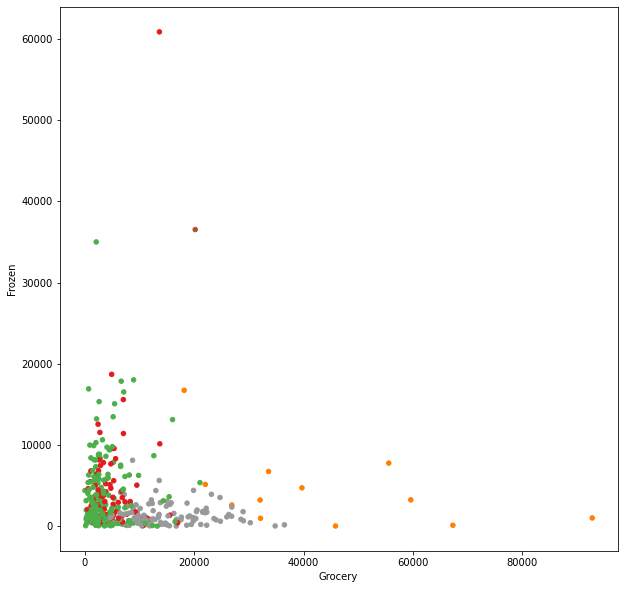

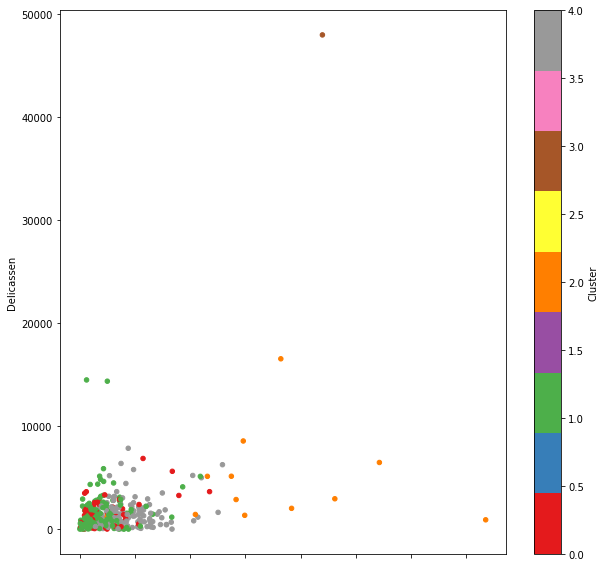

In [14]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

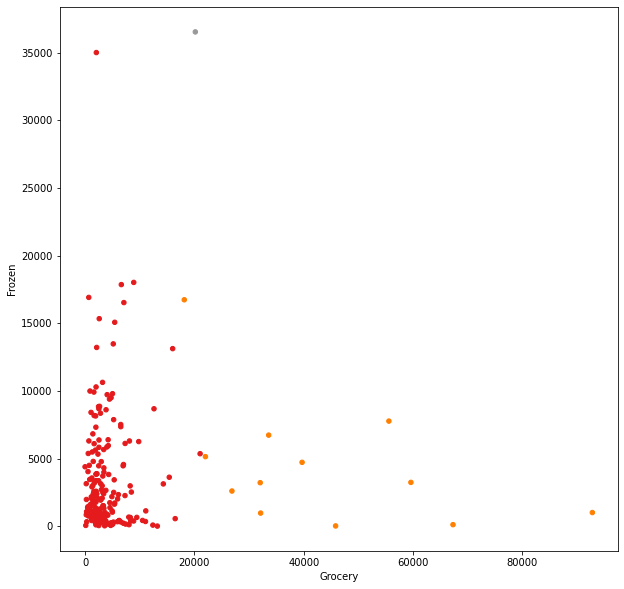

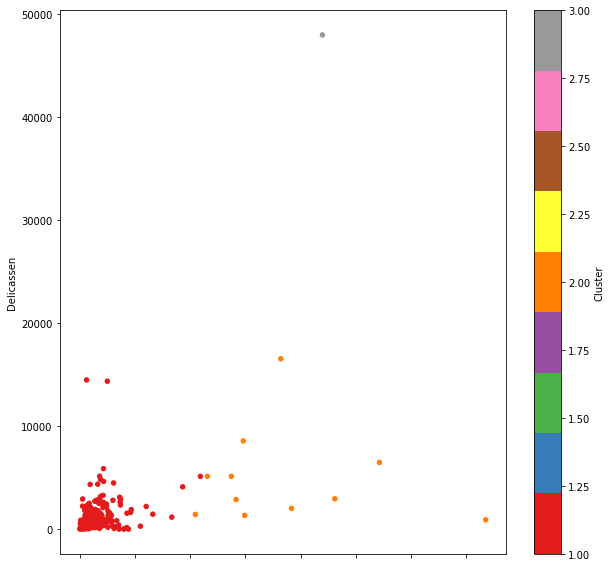

In [15]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()
